# Nakar and Piran Test

Equate the Amati relation to the inverse square law to eliminate $E_{iso}$. 

### Amati Equation:
\begin{equation}
E_{iso} = 8.511\times10^{47} [E_{pk}(1+z)]^{2.04} = 8.511\times10^{47} E_{pk}^{2.04} (1+z)^{2.04} 
\end{equation}


### The Inverse Square Law is given by:

\begin{equation}
E_{iso} = 4 \pi D_L^2 \frac{S_{bolo}}{1+z} 
\end{equation}

#### Solve it for $S_{bolo}$
\begin{equation}
S_{bolo} = \frac{E_{iso} (1+z)}{4 \pi D_L^2}
\end{equation}

### Plug in the Amati Relation for $E_{iso}$ (in power form)

\begin{equation}
S_{bolo} = \frac{A E_{pk}^{2.04} (1+z)^{2.04} (1+z)}{4 \pi D_L^2}
\end{equation}
where $A= 10^{47.93} = 8.511\times10^{47}$.

$(1+z)^{2.04} (1+z) = (1+z)^{3.04}$

\begin{equation}
S_{bolo} = \frac{A E_{pk}^{2.04} (1+z)^{3.04}}{4 \pi D_L^2}
\end{equation}

### Solve for $\frac{E_{pk}^{2.04}}{S_{bolo}}$


\begin{equation}
\frac{E_{pk}^{2.04}}{S_{bolo}} = \frac{4 \pi D_L^2}{A (1+z)^{3.04}}
\end{equation}

where $A= 10^{47.93} = 8.511\times10^{47}$.

```

```
## Ghirlanda Relation

$\displaystyle{{ \log_{10}(E_{\gamma}) = 46.53 + 1.63 \log_{10}(E_{pk}(1+z)) \ \ }}$ 
**or**
$\displaystyle{{ \ \ E_{\gamma} = 10^{46.53} [E_{pk}(1+z)]^{1.63} }}$ 

${\displaystyle{ \log_{10} E_{\gamma} = 47.13 + 1.43 \log_{10} (E_{pk}(1+z) ) \ \ }}$
**or**
${ \ \ \displaystyle{ E_{\gamma} = 10^{47.13} (E_{pk}(1+z))^{1.43} }}$

### AND
${\displaystyle{ E_{\gamma} \ \ = \ \ 10^{47.13} (E_{pk}(1+z))^{1.43} \ \ = \ \ (1-\cos\theta) E_{iso} \ \ = \ \ F_{beam}E_{iso}}}$

### Sub in Ghirlanda relation:
\begin{equation}
S_{bolo} = \frac{E_{iso} (1+z)}{4 \pi D_L^2}
\end{equation}

becomes 

\begin{equation}
S_{bolo} = \frac{E_{\gamma} (1+z)}{4 \pi D_L^2 F_{beam}}
\end{equation}

becomes 

\begin{equation}
S_{bolo} = \frac{10^{47.13} E_{pk}^{1.43} (1+z)^{1.43} (1+z)}{4 \pi D_L^2 F_{beam}}
\end{equation}

\begin{equation}
S_{bolo} = \frac{10^{47.13} E_{pk}^{1.43} (1+z)^{2.43}}{4 \pi D_L^2 F_{beam}}
\end{equation}

### Solve for $\frac{E_{pk}^{1.43}}{S_{bolo}}$

\begin{equation}
\frac{E_{pk}^{1.43}}{S_{bolo}} = \frac{4 \pi D_L^2 F_{beam}}{A (1+z)^{2.43}}
\end{equation}

where $A = 10^{47.13} = 1.349\times10^{47}$

# Amati:
\begin{equation}
\frac{E_{pk}^{2.04}}{S_{bolo}} = \frac{4 \pi D_L^2}{A (1+z)^{3.04}}
\end{equation}

where $A=8.511\times10^{47}$.

# Ghirlanda:
\begin{equation}
\frac{E_{pk}^{1.43}}{S_{bolo}} = \frac{4 \pi D_L^2 F_{beam}}{A (1+z)^{2.43}}
\end{equation}

where $A = 10^{47.13} = 1.349\times10^{47}$.

#### The Nakar and Piran test:
The ratio is to place the terms on the left hand side that are observables and the terms on the right hand side that are redshift (i.e., distance) dependent. As distance to the object increases, $D_L$ rises and $(1+z)^{-3.04}$ (or $(1+z)^{-2.34}$) decreases, thus revealing a maximum redshift. 

In [34]:
import sys
sys.path.insert(1, '/Users/kimzoldak/Github/')  # import at runtime


import numpy as np
from numpy import pi
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from grbTools.cosmo.lumdist import LumDist

# Vectorize the LumDist function so that we can pass many redshifts to it at once. 
Lum_Dist = np.vectorize(LumDist)

In [35]:
def epeak_sbolo_ratio(redshift, lumdistance, exponent, amplitude, fbeam=1):
    z = redshift
    DL = lumdistance
    c = exponent
    A = amplitude
    fb = fbeam
    ratio = (4.*pi*(DL**2)*fb)/(A*(1.+z)**(c+1.))
    return ratio

In [36]:
def epeak_sbolo_ratio_left(sbolometric, epeak, exponent):
    c = exponent
    k = epeak
    sb = sbolometric
    return (k**c)/sb

In [65]:
def find_relation_max(redshifts, data):
    df = pd.DataFrame(list(zip(redshifts, data)), columns=['x', 'y'])
    #ymax = df.y.max()
    redshiftMax = float(df[df['y'] == df.y.max()]['x'])
    print('Max redshift and max Epk/Sbolo ratio')
    print('%.3f  %.4E'%(redshiftMax, df.y.max()))
    return redshiftMax, df.y.max()

In [37]:
# dummy redshifts
redshifts = np.linspace(0.01, 20, 400)

In [156]:

cosmo_constants = {'hubble_constant': 67.8,
                     'matter_density': 0.308} 
lumdistances = Lum_Dist(redshift=redshifts, cosmoconstants=cosmo_constants)

In [157]:
cosmo_constants2 = {'hubble_constant': 74.0,
                     'matter_density': 0.3}
lumdistances2 = Lum_Dist(redshift=redshifts, cosmoconstants=cosmo_constants2)

## Lets consider only the Amati relation for now.

In [158]:
# Amati 
AR_1 = epeak_sbolo_ratio(redshift=redshifts, 
                  lumdistance=lumdistances, 
                  exponent=2.04, 
                  amplitude=8.511E47, 
                  fbeam=1)

# Amati 
AR_2 = epeak_sbolo_ratio(redshift=redshifts, 
                  lumdistance=lumdistances2, 
                  exponent=2.04, 
                  amplitude=8.511E47, 
                  fbeam=1)

In [159]:
find_relation_max(redshifts=redshifts, data=AR_1)

Max redshift and max Epk/Sbolo ratio
3.617  1.4255E+09


(3.6172180451127813, 1425478248.1453638)

In [160]:
find_relation_max(redshifts=redshifts, data=AR_2)

Max redshift and max Epk/Sbolo ratio
3.617  1.2163E+09


(3.6172180451127813, 1216308133.9124455)

In [161]:
out1 = find_relation_max(redshifts=redshifts, data=AR_1)

out2 = find_relation_max(redshifts=redshifts, data=AR_2)

np.diff([out1[0], out2[0]]), np.diff([out1[1], out2[1]])

Max redshift and max Epk/Sbolo ratio
3.617  1.4255E+09
Max redshift and max Epk/Sbolo ratio
3.617  1.2163E+09


(array([0.]), array([-2.09170114e+08]))

The function peaks at z=3.617, regardless of $H_0$ used in the concordance cosmology. The corresponding epk/sbolo ratio, however, highly depends on $H_0$ and at the max redshift the ratio is 1.4489E+09 ($H_0=67.8$, $\Omega_M=0.3$) and 1.2163E+09 ($H_0=74$, $\Omega_M=0.3$), which is a difference of 2.32622728e+08 in the ratio for just the difference in the Hubble Constant. 

If we use the cosmology constants we adopt ($H_0=67.8$, $\Omega_M=0.308$), then the ratio is 1.4255E+09 at z=3.617, the max redshift. The maximum redshift (peak in the curve) that the Amati relation's Epk/Sbolo returns does not vary when we vary the value of $H_0$. Significantly changing $\Omega_M$ however will change zmax.  

The Amati relation used in the above analysis was $A=10^{47.93}$ and $c=2.04$. 



### Plot of the Amati's only

Max redshift and max Epk/Sbolo ratio
3.617  1.4255E+09
Max redshift and max Epk/Sbolo ratio
3.617  1.2163E+09


<Figure size 432x288 with 0 Axes>

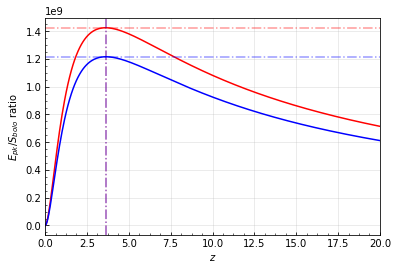

In [119]:
plt.clf()

plt.figure(figsize=(6,4))
plt.grid(alpha=0.3)

plt.plot(redshifts, AR_1, color='red')
AR_1_max = find_relation_max(redshifts=redshifts, data=AR_1)
plt.axvline(AR_1_max[0], 0, 1, ls='-.', color='red', alpha=0.4)  # max redshift
plt.axhline(AR_1_max[1], 0, 1, ls='-.', color='red', alpha=0.4)  # max ratio

plt.plot(redshifts, AR_2, color='blue')
AR_2_max = find_relation_max(redshifts=redshifts, data=AR_2)
plt.axvline(AR_2_max[0], 0, 1, ls='-.', color='blue', alpha=0.4)  # max redshift
plt.axhline(AR_2_max[1], 0, 1, ls='-.', color='blue', alpha=0.4)  # max ratio

plt.xlim(0, 20)
plt.minorticks_on()
plt.xlabel(r'$z$')
plt.ylabel(r'$E_{pk}/S_{bolo}$ ratio')
plt.show()

## Trying Different Amati Relations

In [163]:
yints = [47.96, 47.93, 48.296, 48.434, 48.063, 48.517, 48.0]
slopes = [2.04, 2.04, 1.852, 1.821, 1.919, 1.802, 2.0]

In [164]:
cosmo_constants = {'hubble_constant': 67.8,
                     'matter_density': 0.308} 
lumdistances = Lum_Dist(redshift=redshifts, cosmoconstants=cosmo_constants)

for yint,slope in zip(yints,slopes):
    AR = epeak_sbolo_ratio(redshift=redshifts, 
                      lumdistance=lumdistances, 
                      exponent=slope, 
                      amplitude=10**yint, 
                      fbeam=1)

    AR_max = find_relation_max(redshifts=redshifts, data=AR)


Max redshift and max Epk/Sbolo ratio
3.617  1.3303E+09
Max redshift and max Epk/Sbolo ratio
3.617  1.4254E+09
Max redshift and max Epk/Sbolo ratio
4.719  8.3367E+08
Max redshift and max Epk/Sbolo ratio
4.920  6.4076E+08
Max redshift and max Epk/Sbolo ratio
4.269  1.2723E+09
Max redshift and max Epk/Sbolo ratio
5.070  5.4764E+08
Max redshift and max Epk/Sbolo ratio
3.818  1.2908E+09


Max redshift and max Epk/Sbolo ratio
3.617  1.3303E+09
Max redshift and max Epk/Sbolo ratio
3.617  1.4254E+09
Max redshift and max Epk/Sbolo ratio
4.719  8.3367E+08
Max redshift and max Epk/Sbolo ratio
4.920  6.4076E+08
Max redshift and max Epk/Sbolo ratio
4.269  1.2723E+09
Max redshift and max Epk/Sbolo ratio
5.070  5.4764E+08
Max redshift and max Epk/Sbolo ratio
3.818  1.2908E+09


<Figure size 432x288 with 0 Axes>

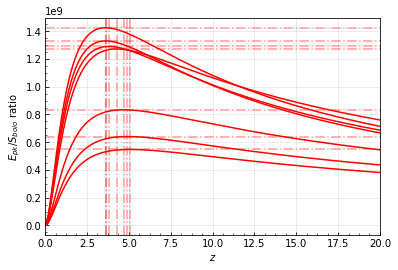

In [165]:

cosmo_constants = {'hubble_constant': 67.8,
                     'matter_density': 0.308} 
lumdistances = Lum_Dist(redshift=redshifts, cosmoconstants=cosmo_constants)


plt.clf()

plt.figure(figsize=(6,4))
plt.grid(alpha=0.3)

for yint,slope in zip(yints,slopes):
    AR = epeak_sbolo_ratio(redshift=redshifts, 
                      lumdistance=lumdistances, 
                      exponent=slope, 
                      amplitude=10**yint, 
                      fbeam=1)
    
    plt.plot(redshifts, AR, color='red')
    AR_max = find_relation_max(redshifts=redshifts, data=AR)
    plt.axvline(AR_max[0], 0, 1, ls='-.', color='red', alpha=0.4)  # max redshift
    plt.axhline(AR_max[1], 0, 1, ls='-.', color='red', alpha=0.4)  # max ratio
plt.xlim(0, 20)
plt.minorticks_on()
plt.xlabel(r'$z$')
plt.ylabel(r'$E_{pk}/S_{bolo}$ ratio')
plt.show()

In [ ]:
plt.clf()

plt.figure(figsize=(6,4))
plt.grid(alpha=0.3)

plt.plot(redshifts, AR_1, color='red')
AR_1_max = find_relation_max(redshifts=redshifts, data=AR_1)
plt.axvline(AR_1_max[0], 0, 1, ls='-.', color='red', alpha=0.4)  # max redshift
plt.axhline(AR_1_max[1], 0, 1, ls='-.', color='red', alpha=0.4)  # max ratio

plt.plot(redshifts, AR_2, color='blue')
AR_2_max = find_relation_max(redshifts=redshifts, data=AR_2)
plt.axvline(AR_2_max[0], 0, 1, ls='-.', color='blue', alpha=0.4)  # max redshift
plt.axhline(AR_2_max[1], 0, 1, ls='-.', color='blue', alpha=0.4)  # max ratio

plt.xlim(0, 20)
plt.minorticks_on()
plt.xlabel(r'$z$')
plt.ylabel(r'$E_{pk}/S_{bolo}$ ratio')
plt.show()

## Considering the Ghirlanda Relation

In [ ]:
# Ghirlanda
GR_1 = epeak_sbolo_ratio(redshift=redshifts, 
                  lumdistance=lumdistances, 
                  exponent=1.43, 
                  amplitude=1.349E47, 
                  fbeam=1)


# Ghirlanda
GR_2 = epeak_sbolo_ratio(redshift=redshifts, 
                  lumdistance=lumdistances2, 
                  exponent=1.43, 
                  amplitude=1.349E47, 
                  fbeam=1)


find_relation_max(redshifts=redshifts, data=GR_1)

find_relation_max(redshifts=redshifts, data=GR_2)

out1 = find_relation_max(redshifts=redshifts, data=GR_1)

out2 = find_relation_max(redshifts=redshifts, data=GR_2)

np.diff([out1[0], out2[0]]), np.diff([out1[1], out2[1]])

### Plot of the Ghirlandas only

Max redshift and max Epk/Sbolo ratio
12.435  2.9676E+10
Max redshift and max Epk/Sbolo ratio
12.786  2.9788E+10


<Figure size 432x288 with 0 Axes>

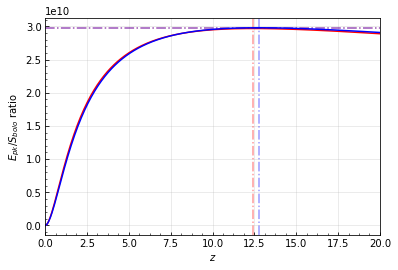

In [83]:
plt.clf()

plt.figure(figsize=(6,4))
plt.grid(alpha=0.3)

plt.plot(redshifts, GR_1, color='red')
GR_1_max = find_relation_max(redshifts=redshifts, data=GR_1)
plt.axvline(GR_1_max[0], 0, 1, ls='-.', color='red', alpha=0.4)  # max redshift
plt.axhline(GR_1_max[1], 0, 1, ls='-.', color='red', alpha=0.4)  # max ratio

plt.plot(redshifts, GR_2, color='blue')
GR_2_max = find_relation_max(redshifts=redshifts, data=GR_2)
plt.axvline(GR_2_max[0], 0, 1, ls='-.', color='blue', alpha=0.4)  # max redshift
plt.axhline(GR_2_max[1], 0, 1, ls='-.', color='blue', alpha=0.4)  # max ratio

plt.xlim(0, 20)
plt.minorticks_on()
plt.xlabel(r'$z$')
plt.ylabel(r'$E_{pk}/S_{bolo}$ ratio')
plt.show()

In [ ]:
# data = pd.DataFrame(list(zip(redshifts, out)), columns=['x', 'y'])
# ymax = data.y.max()
# redshiftMax = float(data[data['y'] == ymax]['x'])
# print('Max redshift and max Epk/Sbolo ratio')
# print('%.3f  %.3E'%(redshiftMax, data.y.max()))

plt.clf()

plt.figure(figsize=(6,4))
plt.grid(alpha=0.3)
plt.plot(redshifts, out)
plt.xlim(0, 20)
plt.minorticks_on()
plt.axvline(redshiftMax, 0, 1, color='red', alpha=0.4)
plt.show()

In [22]:
redshifts = np.linspace(0, 20, 400)

out = [NPtest(red) for red in redshifts]

#data = pd.DataFrame(list(zip(redshifts, out/max(out))), columns=['x', 'y'])
data = pd.DataFrame(list(zip(redshifts, out)), columns=['x', 'y'])

ymax = data.y.max()

redshiftMax = float(data[data['y'] == ymax]['x'])

print('Max redshift and max Epk/Sbolo ratio')
print('%.3f  %.3E'%(redshiftMax, data.y.max()))

plt.clf()

plt.figure(figsize=(6,4))
plt.grid(alpha=0.3)
plt.plot(redshifts, out)
plt.xlim(0, 20)
plt.minorticks_on()
plt.axvline(redshiftMax, 0, 1, color='red', alpha=0.4)
plt.show()

Max redshift and max Epk/Sbolo ratio
3.609  1.124E+09


#### Normalized

<Figure size 432x288 with 0 Axes>

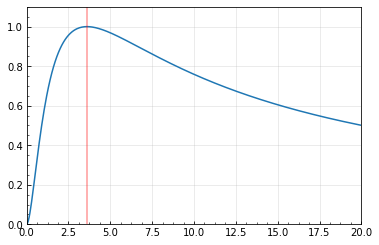

In [10]:
plt.clf()

plt.figure(figsize=(6,4))
plt.grid(alpha=0.3)
plt.plot(redshifts, out/max(out))
plt.xlim(0, 20)
plt.ylim(0, 1.1)
plt.minorticks_on()
plt.axvline(redshiftMax, 0, 1, color='red', alpha=0.4)
plt.show()

In [ ]:
redshiftMax = float(data[data['y'] == ymax]['x'])

In [12]:
data[data]

,x,y
0,0.000000,0.000000e+00
1,0.050125,6.418985e+06
2,0.100251,2.387496e+07
3,0.150376,5.002857e+07
4,0.200501,8.294980e+07
5,0.250627,1.210435e+08
6,0.300752,1.629908e+08
7,0.350877,2.077024e+08
8,0.401003,2.542807e+08
9,0.451128,3.019883e+08


If we use $m=0.48$, then you get the max redshift of $z_{max}=3.41$. 

If we use $m=0.49$, then you get the max redshift of $z_{max}=3.61$. 

If we use $m=0.50$, then you get the max redshift of $z_{max}=3.81$. 

\begin{equation}
\frac{E^{(1/m)}_{pk}}{S_{bolo}}
\end{equation}

\begin{equation}
S_{bolo, max} = (1/y)*E^{(1/m)}_{pk}
\end{equation}

where 
\begin{equation}
S_{bolo, max} = (1/y)*E^{(1/m)}_{pk}
\end{equation}

In [55]:
np.log10(1E52)

52.0

In [59]:
ydata

array([24.03      , 24.08444444, 24.13888889, 24.19333333, 24.24777778,
       24.30222222, 24.35666667, 24.41111111, 24.46555556, 24.52      ,
       24.57444444, 24.62888889, 24.68333333, 24.73777778, 24.79222222,
       24.84666667, 24.90111111, 24.95555556, 25.01      , 25.06444444,
       25.11888889, 25.17333333, 25.22777778, 25.28222222, 25.33666667,
       25.39111111, 25.44555556, 25.5       , 25.55444444, 25.60888889,
       25.66333333, 25.71777778, 25.77222222, 25.82666667, 25.88111111,
       25.93555556, 25.99      , 26.04444444, 26.09888889, 26.15333333,
       26.20777778, 26.26222222, 26.31666667, 26.37111111, 26.42555556,
       26.48      , 26.53444444, 26.58888889, 26.64333333, 26.69777778,
       26.75222222, 26.80666667, 26.86111111, 26.91555556, 26.97      ,
       27.02444444, 27.07888889, 27.13333333, 27.18777778, 27.24222222,
       27.29666667, 27.35111111, 27.40555556, 27.46      , 27.51444444,
       27.56888889, 27.62333333, 27.67777778, 27.73222222, 27.78

<Figure size 432x288 with 0 Axes>

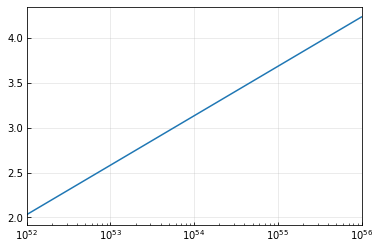

In [125]:
xdata = np.logspace(52, 56, 100)
amati = lambda x: -26.62 + 0.551*np.log10(x)
ydata = amati(xdata)

plt.clf()

plt.figure(figsize=(6,4))
plt.grid(alpha=0.3)
plt.plot(xdata, ydata)
plt.xscale('log')
plt.xlim(1E52, 1E56)
plt.show()

In [ ]:
xdata = np.logspace(52, 56, 100)
amati = lambda x: -26.62 + 0.551*np.log10(x)
ydata = amati(xdata)

plt.clf()

plt.figure(figsize=(6,4))
plt.grid(alpha=0.3)
plt.plot(xdata, ydata)
plt.xscale('log')
plt.xlim(1E52, 1E56)
plt.show()

<Figure size 432x288 with 0 Axes>

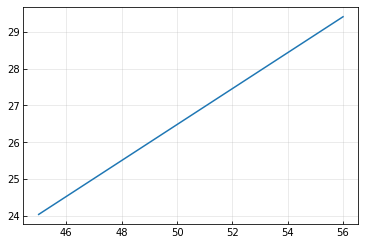

In [56]:
xdata = np.linspace(45, 56, 100)
amati = lambda x: 1.98 + 0.49*x
ydata = amati(xdata)

plt.clf()

plt.figure(figsize=(6,4))
plt.grid(alpha=0.3)
plt.plot(xdata, ydata)
#plt.xlim(50, 55)
plt.show()